# Data Visualization with Matplotlib

## Data Numeric and Timestamp with Line Chart

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Data dummy
data_bogor = {
    "bulan": ["Januari", "Februari", "Maret", "April", "Mei", "Juni", 
              "Juli", "Agustus", "September", "Oktober", "November", "Desember"],
    "mean_temp": [25.32, 27.89, 28.15, 29.45, 30.78, 31.12, 32.98, 30.56, 29.23, 29.87, 27.65, 26.91]

}

data_bandung = {
    "bulan": ["Januari", "Februari", "Maret", "April", "Mei", "Juni", 
              "Juli", "Agustus", "September", "Oktober", "November", "Desember"],
    "mean_temp": [29.87, 28.15, 30.78, 27.65, 30.56, 29.45, 27.89, 31.12, 26.91, 25.32, 32.98, 29.23]

}
# Membuat DataFrame
bogor_temp = pd.DataFrame(data_bogor)
bandung_temp = pd.DataFrame(data_bandung)

# Load data excel
# df = pd.read_excel('../dataset/data_ui.xlsx')
# df = df.iloc[:, 0:20]

# df.columns =  ['Timestamp', 'NPM', 'jenis_kelamin', 'prodi',
#               'jalur_masuk', 'daerah_asal', 'jenis_sekolah',
#               'usia', 'math', 'math_score', 'height', 'weight',
#               'glasses', 'avg_rhand', 'avg_lhand', 'special_ability',
#               'most_platform', 'avg_hours', 'capaian', 'semester']
# df.columns


# Menampilkan DataFrame
bogor_temp

,bulan,mean_temp
0,Januari,25.32
1,Februari,27.89
2,Maret,28.15
3,April,29.45
4,Mei,30.78
5,Juni,31.12
6,Juli,32.98
7,Agustus,30.56
8,September,29.23
9,Oktober,29.87


### Data Visualization subplots()

#### Basics

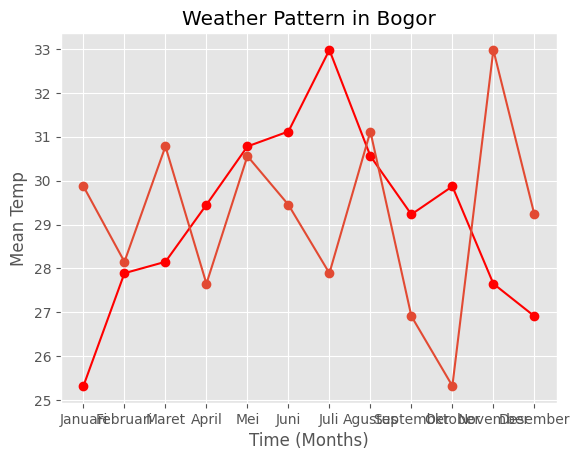

In [2]:
# Merancang canvas dari awal
fig, ax = plt.subplots()
ax.plot(bogor_temp['bulan'], bogor_temp['mean_temp'],
       marker='o', color='r')
ax.plot(bandung_temp['bulan'], bandung_temp['mean_temp'],
       marker='o')
# Adding lable
ax.set_xlabel("Time (Months)")
ax.set_ylabel("Mean Temp")
ax.set_title("Weather Pattern in Bogor")
plt.show()

#### Small Multiples (Many Canvas)

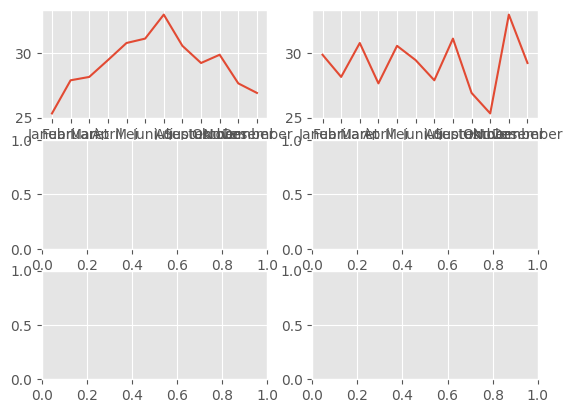

In [3]:
fig, ax = plt.subplots(3, 2)
ax[0,0].plot(bogor_temp['bulan'], bogor_temp['mean_temp'])
ax[0,1].plot(bandung_temp['bulan'], bandung_temp['mean_temp'])
plt.show()

Special case: If the canvas is only one row or columns, so set the data with only ax[0].plot or ax[1].plot

and In case the range value of y-axis from both data are not the same, you can make It cleaner with make it the same range by adding sharey=True in subplots()

### Plot time-series data

In [4]:
# Load data
climate_change = pd.read_csv('../dataset/climate.csv', parse_dates=['date'], index_col="date")
climate_change.dtypes

co2              float64
relative_temp    float64
dtype: object

parse_dates=['dates'] is used to change the selected column to time-series data type

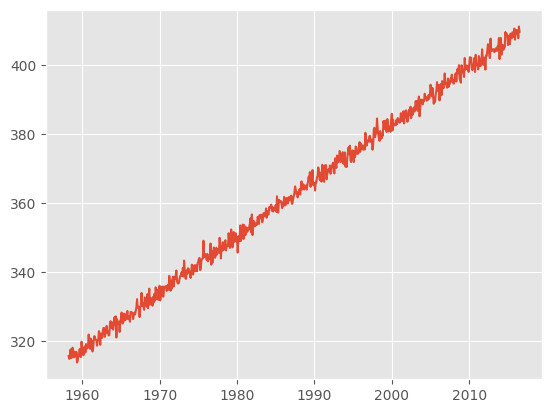

In [5]:
fig, ax = plt.subplots()
ax.plot(climate_change.index, climate_change["co2"])
plt.show()

As you can see, the co2 on earth is increasing by the years 

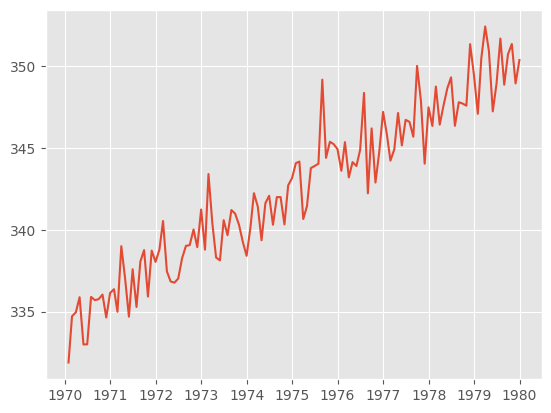

In [6]:
# Selecting 1 decade climate change

# Use plt.subplots to create fig and ax
fig, ax = plt.subplots()

# Create variable seventies with data from "1970-01-01" to "1979-12-31"
seventies = climate_change["1970-01-01":"1979-12-31"]

# Add the time-series for "co2" data from seventies to the plot
ax.plot(seventies.index, seventies["co2"])

# Show the figure
plt.show()

#### Plotting time-series with diff variables using ax.twinx()

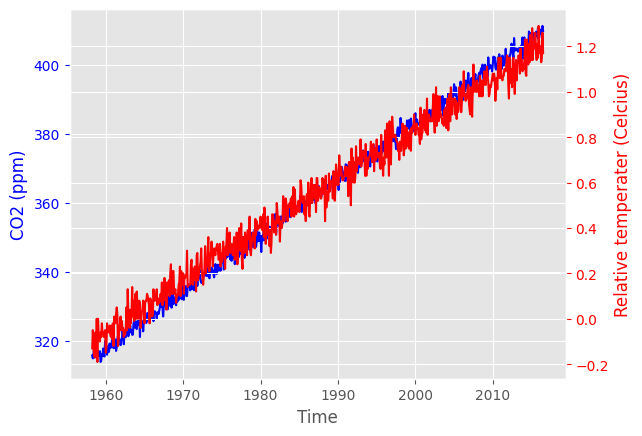

In [7]:
fig, ax = plt.subplots()
ax.plot(climate_change.index, climate_change['co2'], color='b')
ax.set_xlabel('Time')
ax.set_ylabel('CO2 (ppm)', color = 'b')
ax.tick_params('y', colors='b')
ax2 = ax.twinx()
ax2.plot(climate_change.index, climate_change['relative_temp'], color='r')
ax2.set_ylabel('Relative temperater (Celcius)', color = 'r')
ax2.tick_params('y', colors='r')
plt.show()

ax.twinx() is used to duplicate x-axis and using diff y-axis. While tick_params() takes first argumen as axis, either x or y, and colors for the color, and it used to change the y axis value color

#### Function for repeatable code 

In [24]:
def plot_timeseries(axes, x, y, color, xlabel, ylabel):
    axes.plot(x, y, color=color)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.tick_params('y', colors=color)

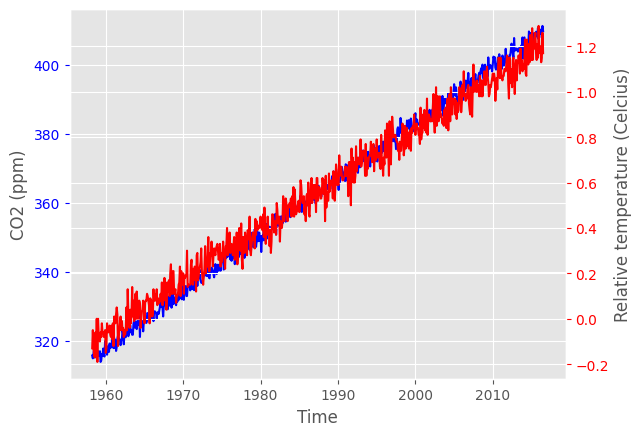

In [25]:
fig, ax = plt.subplots()
plot_timeseries(ax, climate_change.index, climate_change['co2'], 'b', 'Time', 'CO2 (ppm)')
ax2 = ax.twinx()
plot_timeseries(ax2, climate_change.index, climate_change['relative_temp'], 'r', 'Time', 'Relative temperature (Celcius)')

#### Annotation

Text(2008-10-06 00:00:00, -0.2, '>1 degree')

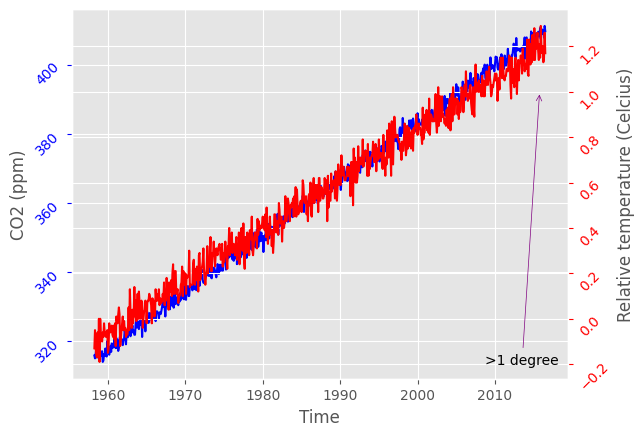

In [10]:
fig, ax = plt.subplots()
plot_timeseries(ax, climate_change.index, climate_change['co2'], 'b', 'Time', 'CO2 (ppm)')
ax2 = ax.twinx()
plot_timeseries(ax2, climate_change.index, climate_change['relative_temp'], 'r', 'Time', 'Relative temperature (Celcius)')

# Adding annotate method
# ax2.annotate(">1 degree", xy=(pd.Timestamp("2015-10-06"), 1)) # is enough, but the annotation is not positioned properly, so 
ax2.annotate(">1 degree", 
            xy=(pd.Timestamp("2015-10-06"), 1),
            xytext=(pd.Timestamp("2008-10-06"), -0.2), # Moving the annotation to the bottom as the x y point
            arrowprops={"arrowstyle":"->", "color":"purple"}) # by the default, arrowprops is just a blank dict, but it can be customized

## Data Quantitative with bar-charts

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
medals = pd.read_csv('../dataset/medal_tally.csv', index_col=0)
medals.head()

,Gold,Silver,Bronze
United States,137,52,67
Germany,47,43,67
Great Britain,64,55,26
Russia,50,28,35
China,44,30,35


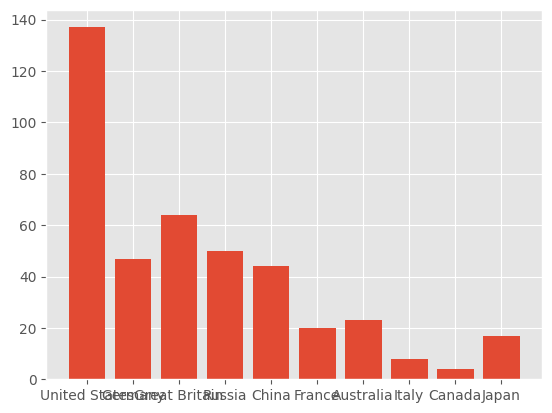

In [13]:
fig, ax = plt.subplots()
ax.bar(medals.index, medals['Gold'])
plt.show()

### Interlude: rotate the tick labels because of the overlapping labels

Text(0, 0.5, 'Number of Medals')

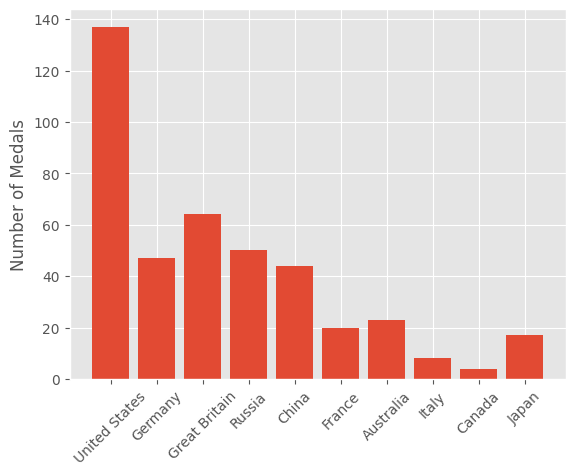

In [14]:
fig, ax = plt.subplots()
ax.bar(medals.index, medals['Gold'])
# ax.set_xticklabels(medals.index, rotation=45)
ax.tick_params(axis='x', rotation=45)
ax.set_ylabel('Number of Medals')

### Stacking bar chart on other medals

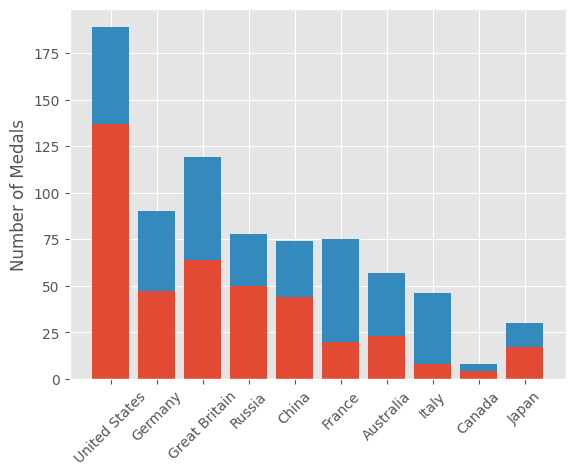

In [15]:
fig, ax=plt.subplots()
ax.bar(medals.index, medals["Gold"])
ax.bar(medals.index, medals["Silver"], bottom=medals["Gold"])
ax.tick_params(axis='x', rotation=45)
ax.set_ylabel('Number of Medals')
plt.show()

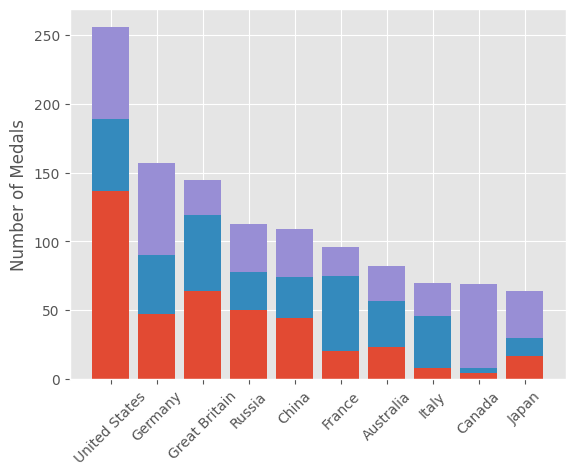

In [16]:
fig, ax=plt.subplots()
ax.bar(medals.index, medals["Gold"])
ax.bar(medals.index, medals["Silver"], bottom=medals["Gold"])
ax.bar(medals.index, medals["Bronze"], bottom=medals["Gold"] + medals['Silver'])
ax.tick_params(axis='x', rotation=45)
ax.set_ylabel('Number of Medals')
plt.show()

### Adding Legend with label="" argument

by adding label argument in each bar method, then add the ax.legend() method aswell

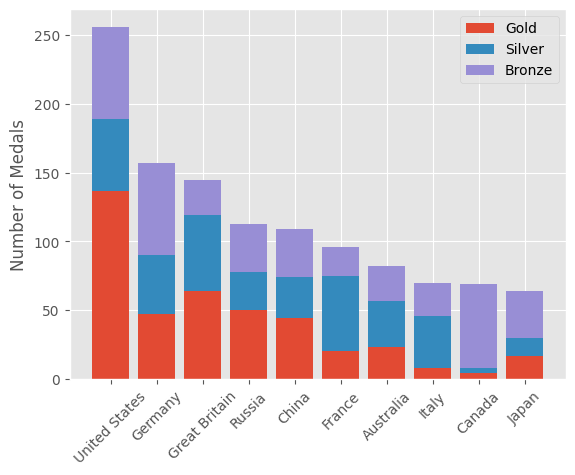

In [17]:
fig, ax=plt.subplots()
ax.bar(medals.index, medals["Gold"], label='Gold')
ax.bar(medals.index, medals["Silver"], bottom=medals["Gold"], label='Silver')
ax.bar(medals.index, medals["Bronze"], bottom=medals["Gold"] + medals['Silver'], label='Bronze')
ax.tick_params(axis='x', rotation=45)
ax.set_ylabel('Number of Medals')
ax.legend()
plt.show()

## Data Quantitative with Histogram

In [18]:
athlete = pd.read_csv('../dataset/athlete_heights.csv')
athlete.head()
athlete.columns

Index(['Rowing_Height', 'Gymnastics_Height'], dtype='object')

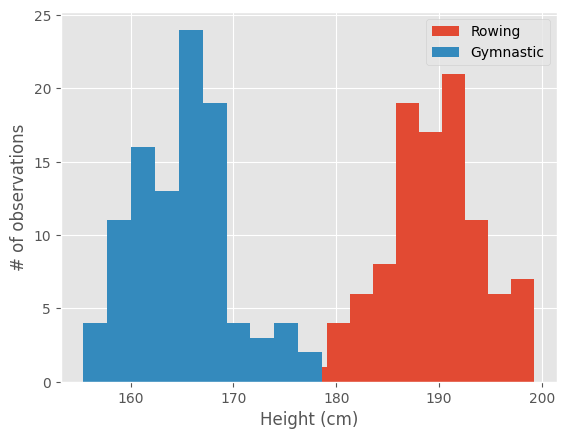

In [19]:
fig, ax = plt.subplots()
ax.hist(athlete['Rowing_Height'], label='Rowing')
ax.hist(athlete['Gymnastics_Height'], label='Gymnastic')
ax.set_xlabel("Height (cm)")
ax.set_ylabel("# of observations")
ax.legend()
plt.show()

### Customizing Histogram: setting the number of bins

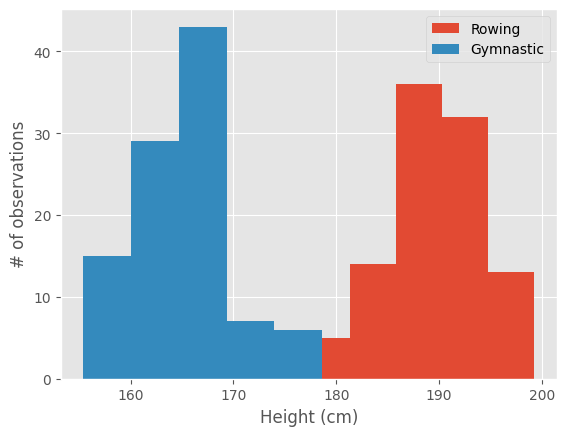

In [20]:
fig, ax = plt.subplots()
ax.hist(athlete['Rowing_Height'], label='Rowing', bins=5)
ax.hist(athlete['Gymnastics_Height'], label='Gymnastic', bins=5)
ax.set_xlabel("Height (cm)")
ax.set_ylabel("# of observations")
ax.legend()
plt.show()

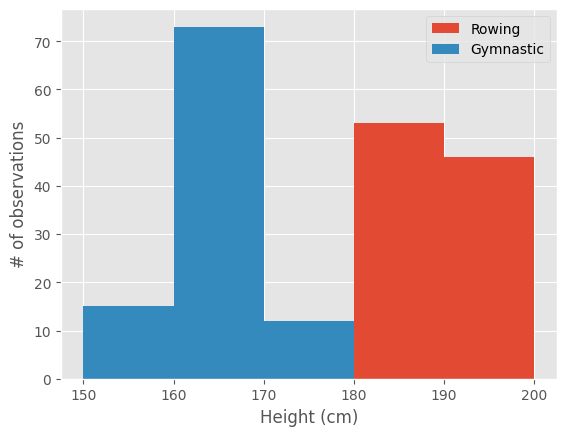

In [21]:
fig, ax = plt.subplots()
ax.hist(athlete['Rowing_Height'], label='Rowing', 
        bins=[150, 160, 170, 180, 190, 200])
ax.hist(athlete['Gymnastics_Height'], label='Gymnastic', 
        bins=[150, 160, 170, 180, 190, 200])
ax.set_xlabel("Height (cm)")
ax.set_ylabel("# of observations")
ax.legend()
plt.show()

You can also custimze the bounderies of the bin by set the bin value to the list of a number

### Customizing Histogram: Transparency

Do you think there are rowing men's height is less than 180cm? Its hard to tell because the rowing bar is hiding behind the gymnastic bar. So transparency of bar is needed.

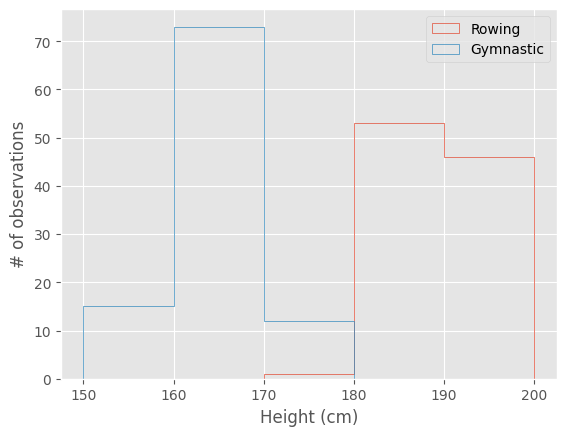

In [22]:
fig, ax = plt.subplots()
ax.hist(athlete['Rowing_Height'], label='Rowing', 
        bins=[150, 160, 170, 180, 190, 200], 
        histtype='step')
ax.hist(athlete['Gymnastics_Height'], label='Gymnastic', 
        bins=[150, 160, 170, 180, 190, 200],
        histtype='step')
ax.set_xlabel("Height (cm)")
ax.set_ylabel("# of observations")
ax.legend()
plt.show()

and yup, there's rowing man with less than 180cm but didn't seem before because the gymnastic bar is hiding it.

## Error Bars in Bar Chart

TypeError: Axes.bar() missing 1 required positional argument: 'height'

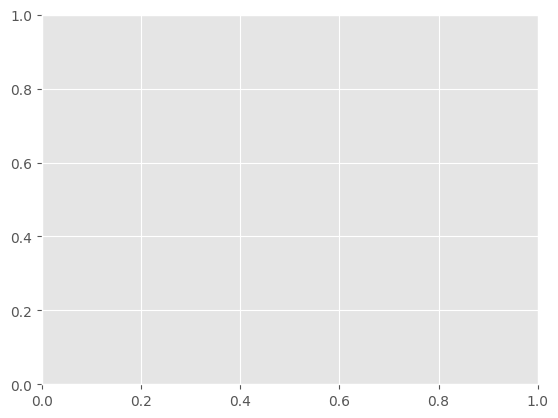

In [23]:
fig, ax = plt.subplots()
ax.bar(athlete['Rowing_Height'].mean(), yerr=athlete['Rowing_Height'].std())
ax.bar(athlete['Gymnastics_Height'].mean(), yerr=athlete['Gymnastics_Height'].std())
plt.show()

## Box Plot

In [ ]:
fig, ax = plt.subplots()

ax.boxplot([athlete['Rowing_Height'], athlete['Gymnastics_Height']])
ax.set_xticklabels(['Rowing', 'Gymnastics'])
ax.set_ylabel('Height')
plt.show()

1. The middle box: Q1 - Q3 range data (called IQR, Interquartile Range)
3. Yellow line: Median of data
4. Whisker: Total range of data
5. Circle: Outliers

## Scatter Plot

In [ ]:
fig, ax = plt.subplots()
ax.scatter(climate_change['co2'], climate_change['relative_temp'])
ax.set_xlabel('CO2 (ppm)')
ax.set_ylabel('Relative temp (Celcius)')
plt.show()

### Customizing Scatter Plot

In [ ]:
eighties = climate_change['1980-01-01':'1989-12-31']
nineties = climate_change['1990-01-01':'1999-12-31']
fig, ax = plt.subplots()
ax.scatter(eighties['co2'], eighties['relative_temp'], color='r', label='Eighties')
ax.scatter(nineties['co2'], nineties['relative_temp'], color='b', label='Nineties')

ax.legend()
ax.set_xlabel('CO2 (ppm)')
ax.set_ylabel('Relative temp (Celcius)')
plt.show()

### Encoding Time in Color

by using c argument, It'll coloring the dots of scatter. Remember that the argumen is only c, not color

In [ ]:
fig, ax = plt.subplots()
ax.scatter(climate_change['co2'], climate_change['relative_temp'], c=climate_change.index)
ax.set_xlabel('CO2 (ppm)')
ax.set_ylabel('Relative temp (Celcius)')
plt.show()